# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
%matplotlib inline


In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [88]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [89]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_weather['coord']['lat'],
            "Lng": city_weather['coord']['lon'],
            "Max Temp": city_weather['main']['temp_max'],
            "Humidity": city_weather['main']['humidity'],
            "Cloudiness": city_weather['clouds']['all'],
            "Wind Speed": city_weather['wind']['speed'],
            "Country": city_weather['sys']['country'],
            "Date": city_weather['dt']
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | muisne
Processing Record 3 of Set 1 | shar
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | vasteras
Processing Record 6 of Set 1 | colonia
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | labrador city
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | oranjemund
Processing Record 14 of Set 1 | beyneu
Processing Record 15 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 1 | la almunia de dona godina
Processing Record 17 of Set 1 | kofele
Processing Record 18 of Set 1 | es castell
Processing Record 19 of Set 1 | gilgit
Processing Record 20 of Set 1 | djambala
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 2

In [93]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [94]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,9.34,67,94,2.35,RU,1722790986
1,muisne,0.6000,-80.0333,25.65,81,98,6.23,EC,1722791203
2,shar,49.5886,81.0453,23.70,33,0,3.97,KZ,1722791204
3,puerto natales,-51.7236,-72.4875,0.25,100,100,3.09,CL,1722790927
4,vasteras,59.6162,16.5528,20.48,72,20,2.57,SE,1722791206


In [95]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [96]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.34,67,94,2.35,RU,1722790986
1,muisne,0.6000,-80.0333,25.65,81,98,6.23,EC,1722791203
2,shar,49.5886,81.0453,23.70,33,0,3.97,KZ,1722791204
3,puerto natales,-51.7236,-72.4875,0.25,100,100,3.09,CL,1722790927
4,vasteras,59.6162,16.5528,20.48,72,20,2.57,SE,1722791206


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

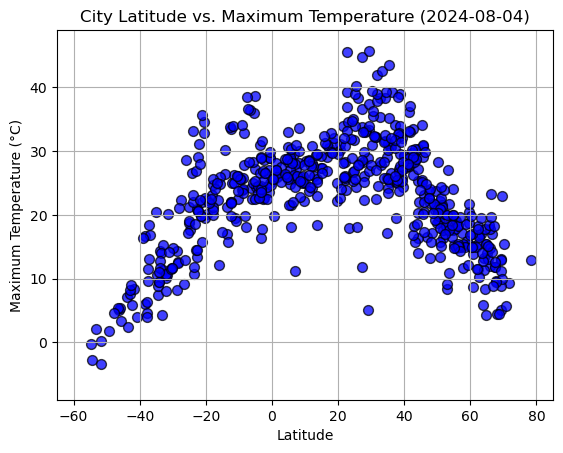

In [97]:
# Build scatter plot for latitude vs. temperature
marker_size = 50
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            marker="o", 
            facecolors="blue", 
            edgecolors="black", 
            s=marker_size, 
            alpha=0.75)

# Incorporate the other graph properties
plt.ylim(-9, 49)
plt.xlim(-65, 85)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°C)")
plt.title("City Latitude vs. Maximum Temperature (2024-08-04)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

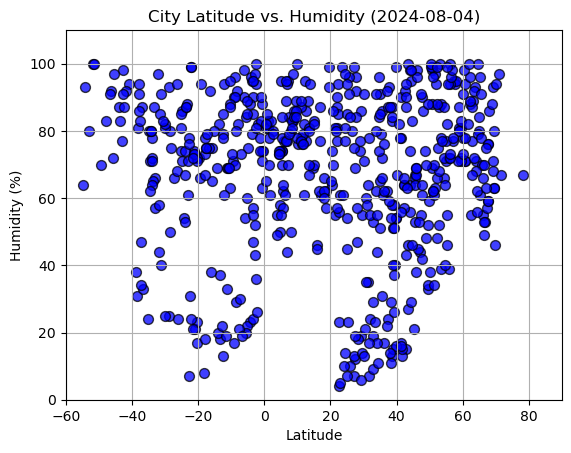

In [98]:
# Build the scatter plots for latitude vs. humidity
marker_size = 50
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            marker="o", 
            facecolors="blue", 
            edgecolors="black", 
            s=marker_size, 
            alpha=0.75)

# Incorporate the other graph properties
plt.ylim(0, 110)
plt.xlim(-60, 90)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-08-04)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

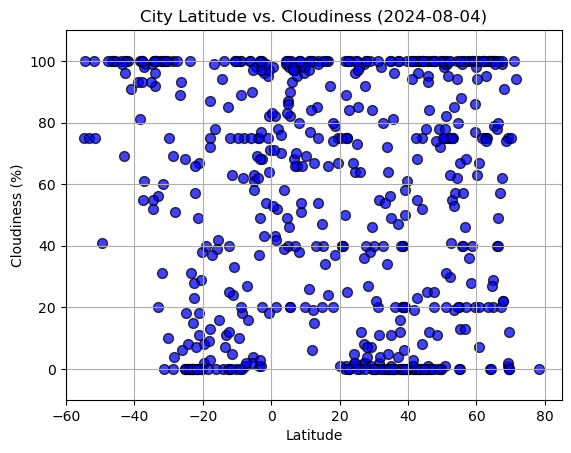

In [99]:
# Build the scatter plots for latitude vs. cloudiness
marker_size = 50
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            marker="o", 
            facecolors="blue", 
            edgecolors="black", 
            s=marker_size, 
            alpha=0.75)

# Incorporate the other graph properties
plt.ylim(-10, 110)
plt.xlim(-60, 85)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-08-04)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

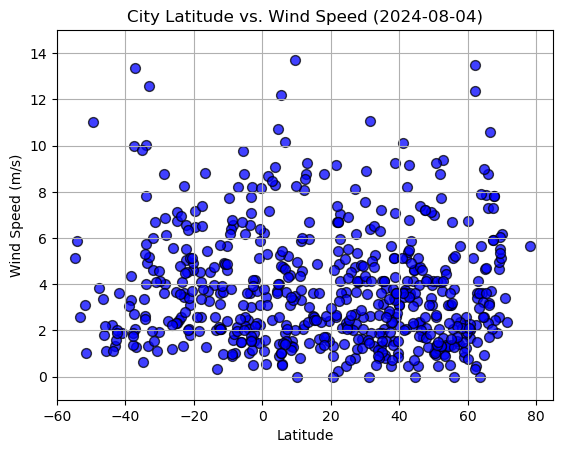

In [100]:
# Build the scatter plots for latitude vs. wind speed
marker_size = 50
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            marker="o", 
            facecolors="blue", 
            edgecolors="black", 
            s=marker_size, 
            alpha=0.75)


# Incorporate the other graph properties
plt.ylim(-1, 15)
plt.xlim(-60, 85)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-08-04)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [102]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] >= 0)])

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.34,67,94,2.35,RU,1722790986
1,muisne,0.6000,-80.0333,25.65,81,98,6.23,EC,1722791203
2,shar,49.5886,81.0453,23.70,33,0,3.97,KZ,1722791204
4,vasteras,59.6162,16.5528,20.48,72,20,2.57,SE,1722791206
5,colonia,50.9333,6.9500,22.20,62,75,2.57,DE,1722790956


In [103]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"] < 0)])

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,0.25,100,100,3.09,CL,1722790927
6,margaret river,-33.9500,115.0667,14.29,78,96,5.76,AU,1722790913
8,puerto ayora,-0.7393,-90.3518,24.98,88,64,2.24,EC,1722791063
10,invercargill,-46.4000,168.3500,5.01,92,100,1.79,NZ,1722790979
12,oranjemund,-28.5500,16.4333,12.54,80,100,3.99,NaN,1722791214


###  Temperature vs. Latitude Linear Regression Plot

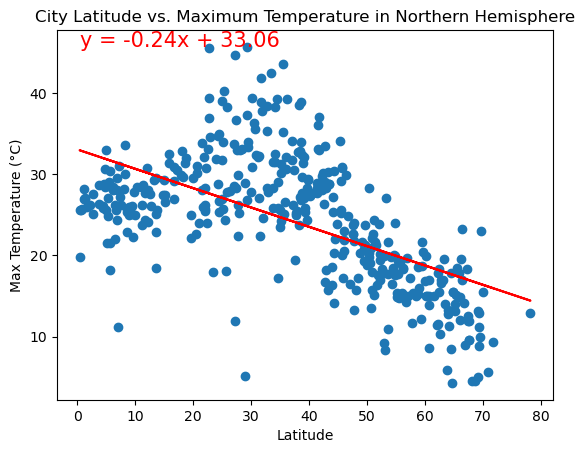

In [104]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Maximum Temperature in Northern Hemisphere")
plt.show()


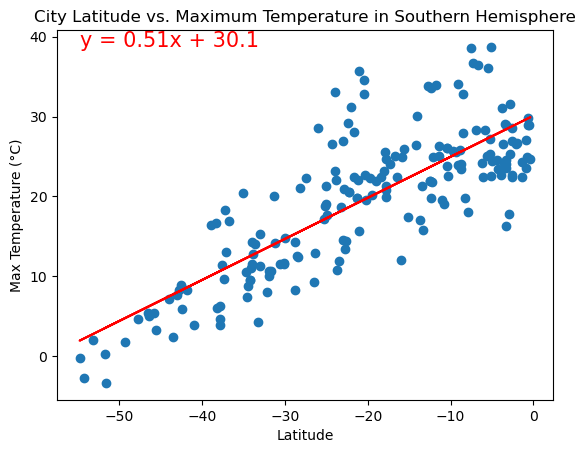

In [105]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Maximum Temperature in Southern Hemisphere")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

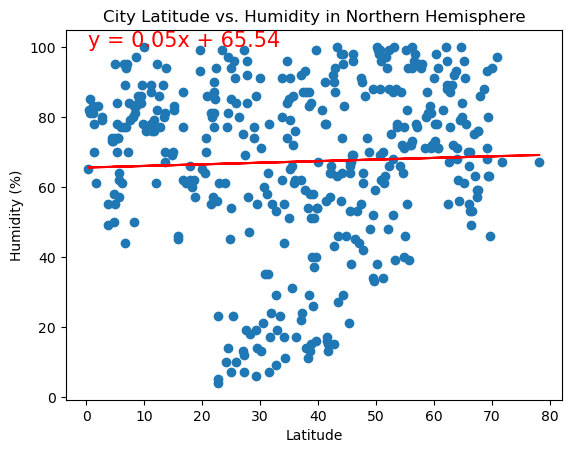

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Northern Hemisphere")
plt.show()


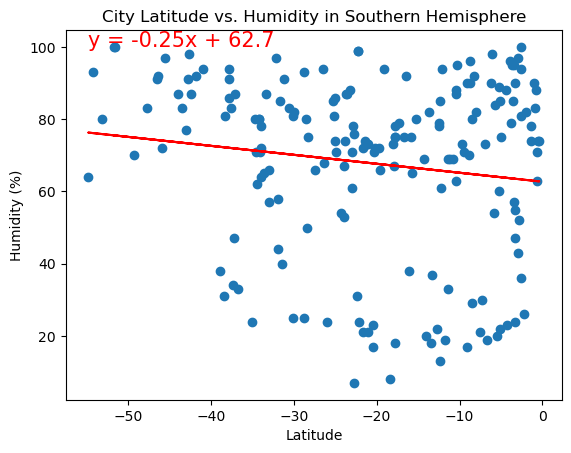

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Southern Hemisphere")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

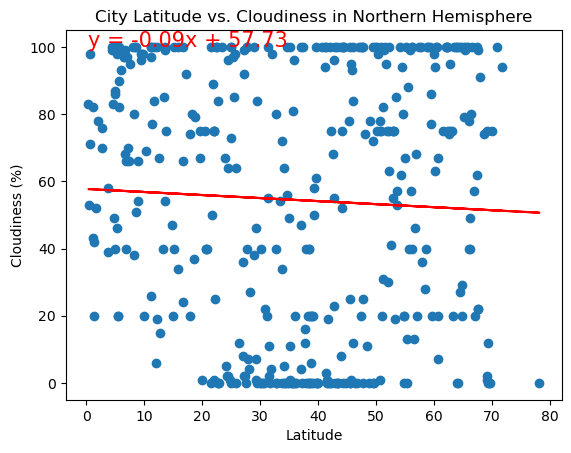

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()


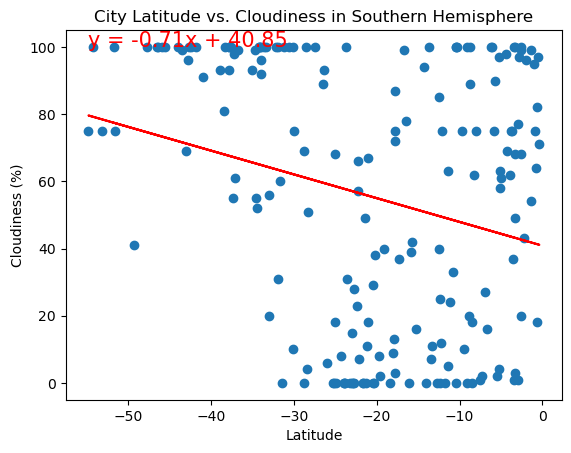

In [109]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

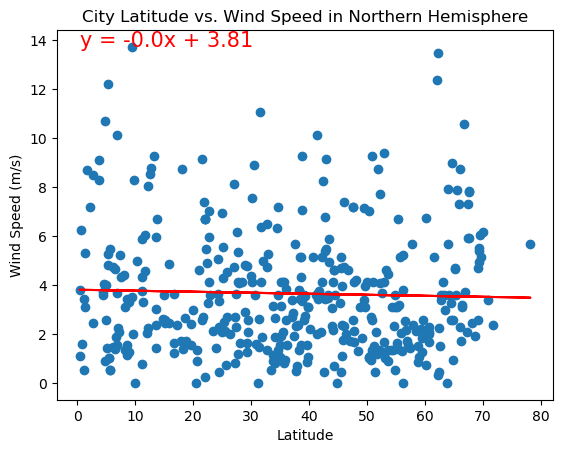

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Northern Hemisphere")
plt.show()


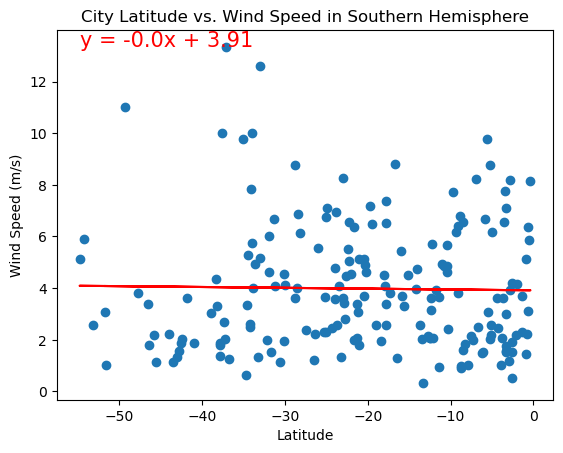

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE